<div class="alert alert-block alert-success">
    <b>ARTIFICIAL INTELLIGENCE (E016350A)</b> <br>
ALEKSANDRA PIZURICA <br>
GHENT UNIVERSITY <br>
AY 2024/2025 <br>
Assistant: Nicolas Vercheval
</div>

# Basic classification - Diabetes classification

This notebook introduces the Keras library and illustrates its basic concepts. Our task is to create a feed-forward neural network that can be used in binary classification of patients into those with and without diabetes.

[Keras](https://keras.io/) is a popular library for deep neural networks. The Google team is working on its development, and the community that uses it is numerous. To be able to use it within the Anaconda environment, it is necessary to install it with the command `conda install -c conda-forge keras` in accordance with [the official guidelines](https://anaconda.org/conda-forge/keras). As its API is high level, in the background, at a low level, Tensor Flow, Theano or CNTK (so-called backend part of the library) can be used. These libraries aim to cover tasks such as efficient algebraic operations and numerical differentiation or parallelization because working with neural networks usually means working with a large amount of data. In our work, it will be TensorFlow, so it is necessary to ensure it is also installed. You can read more about installing the Tensor Flow library [here](https://anaconda.org/conda-forge/tensorflow).

Keras supports two APIs: the `sequential` one, which will be explained in the following examples, and the `functional` one, which gives more flexibility. The functional API can handle models with non-linear topology, shared layers, and multiple inputs or outputs. We will explain it more in the next notebooks.

In [1]:
# First time you have to install TensorFlow and scikeras
#!pip install tensorflow
#!pip install --no-deps scikeras
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import pipeline
import tensorflow as tf
from tensorflow import keras


For now, we will load the `Sequential` and `Dense` functions, that will be explained below.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

### Dataset - Pima Indians Diabetes

The Pima Indians Diabetes dataset consists of $768$ instances. Each instance contains $8$ medically relevant values and is associated with class $1$ or $0$ depending on whether the patient has been diagnosed with diabetes in the last $5$ years.

All attributes are of numeric type with a range of values that varies from attribute to attribute.

The dataset can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database#diabetes.csv).

In [ ]:
data = pd.read_csv(os.path.join(os.pardir, 'data', 'diabetes.csv'))

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.describe()

Our goal is to create a model that will predict whether a patient has diabetes or not, based on the mentioned attributes.

### Step 1: Preparing the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
y = data['Outcome']
X = data.drop(columns=['Outcome'])

We will split the data with the `train_test_split` function of the `scikit-learn` library in the usual way. When dividing the data set, we will take into account the stratification, as explained in the previous session.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6, stratify=y)

In [ ]:
print('Training set - X: {0}, y: {1}'.format(X_train.shape, y_train.shape))

In [ ]:
print('Test set - X: {0}, y: {1}'.format(X_test.shape, y_test.shape))

Due to the numerical stability of the network, we will standardize the data as before.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Step 2: Creating the network

We will make the network so that its architecture meets the following specifications:

* **Layer 1**: fully connected layer with 15 neurons and *ReLu* activation function
* **Layer 2**: fully connected layer with 8 neurons and *ReLu* activation function
* **Layer 3**: fully connected layer with one neuron and *sigmoid* activation function

A neural network with forward propagation is created by the `Sequential` function. In this way, we emphasize that we will add network layers one after the other, connecting the outputs of the previous layer with the inputs of the next layer.

In [ ]:
model = Sequential()

The network consists of individual layers. We can say that layers are modules that process data and generate appropriate outputs for given inputs. We distinguish between the input (first) network layer, the output (last) network layer and layers in between, which we call hidden layers. 

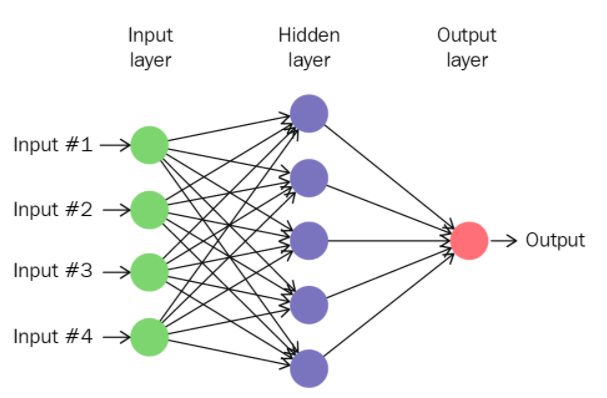

Layers are characterized by a coefficient matrix, the optimal value the network needs to learn during training. The coefficient matrix is called the `kernel` matrix. Its values can be randomly initialized, but some better initialization techniques are usually used in practice, leading to better network training. Currently, the most famous are Gloriot (or Xaviar) and He.

The input, the first layer of the network, can be created by calling the `Input` function. Its argument `shape` indicates the dimension of the input, so we will set its value to `(8,)` because the set we are working with has $8$ attributes. The second dimension of the pair is flexible and will adjust to the size of the batch used when training the net. At the Keras library level, individual network layers are added with the `add` function.

In [ ]:
model.add(Input(shape=(8,)))

As the name suggests, a fully connected layer connects each neuron of the input layer to each neuron of the output layer. The function it calculates can be described by the formula `output = activation (dot (input, kernel) + bias)` where `kernel` represents the layer matrix, `bias` the free term (vector with an additional set of weights in a neural network that requires no input), `dot` the matrix multiplication, and `activation` the activation function which is used at the layer level.

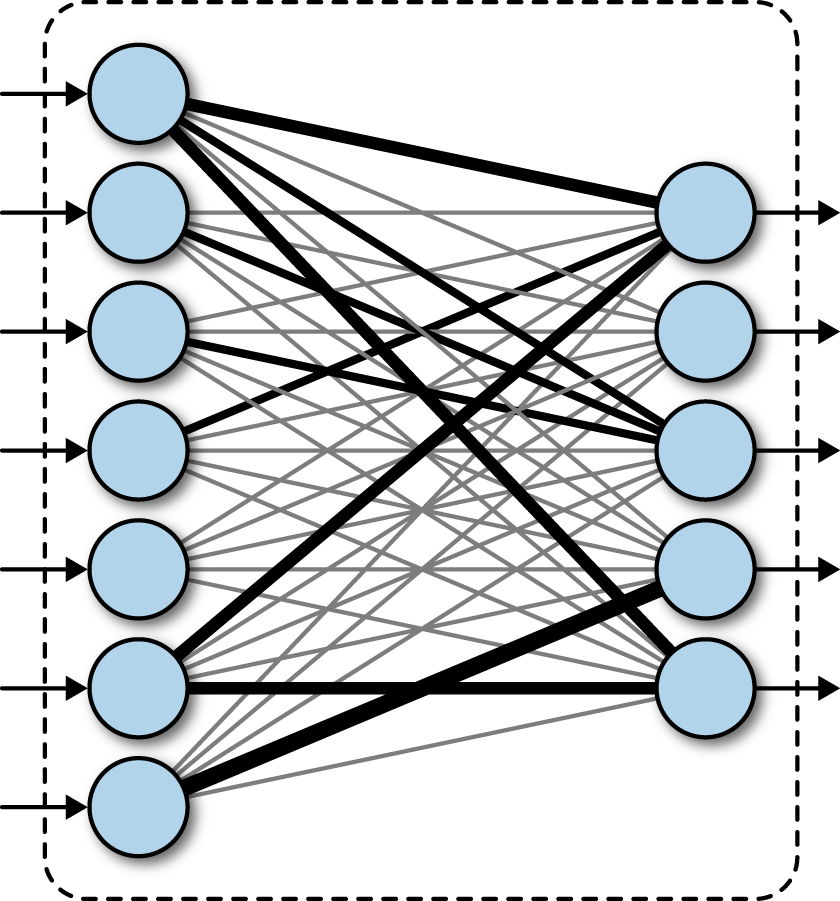

We create a fully connected layer (a dense layer) with the `Dense` function. The number of output neurons is specified through the parameter `units`, whose name is often omitted because it is the first to be specified in the function call. By default, the library matches the outputs of the previous layers with the inputs of the following layers, so it is unnecessary to specify the dimension of the input. The `input_dim` attribute can otherwise be used for this. The name of the activation function is specified by the `activation` parameter, and it can be a sigmoid function, hyperbolic tangent, linear function, ReLu, softmax and many others. Other parameters of the `Dense` function can affect the way of initializing the kernel matrix, the bias term that is added by default, and their regularizations.

Following the architecture specification, we can add the required layers.

In [ ]:
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

The `summary` method describes the network in terms of layer dimensions and tells us the total number of parameters of the network.

In [ ]:
model.summary()

The obtained values reflect the presence of a bias term in each layer of the network when the input layer inputs  ($135 = 8\times 15 + 1\times 15$, $128 = 15\times 8 + 1\times 8$, $9 = 8\times 1 + 1\times1$).

The way of setting the input layer with the `Input` function and setting the first dense layer with the `Dense` function can be combined by adding the parameter `input_dim` to the first dense layer, which specifies the input dimension. So, in the previous block of code, instead of lines

`
model.add(Input(shape = (8,)))
model.add(Dense(units = 15, activation = 'relu'))
`,

we could specify everything in one line:

`model.add(Dense(units = 15, input_dim = 8, activation = 'relu'))`.

However, The first method is more readable and represents a novelty introduced with a newer version of the Keras library.

### Step 3: Training the network

To train the network, you must select an optimizer and a loss function that suits the task. The loss generates the feedback signal necessary for learning itself, and often, it can be used as a metric to evaluate your model's performance. The optimizer further updates the values of the network parameters based on the values obtained in this way. Network training aims to minimize the loss function while maintaining good generalization.

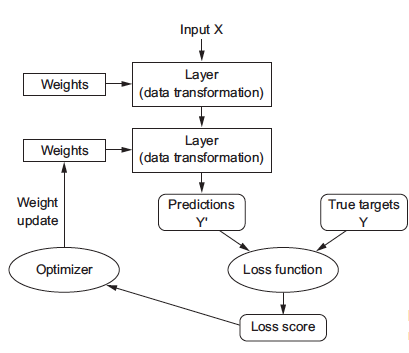

We will train the network according to the following guidelines:
    
* **Error function**: binary cross entropy

* **Optimizer**: Adam

* **Number of epochs**: 50
* **Batch size**: 32

The `compile` function is used to join the loss function model, the optimizer, and, optionally, the metrics to evaluate the network.

In [ ]:
# Uncomment to reinitialize the model
# model = Sequential()
# model.add(Dense(input_dim = 8, units=15, activation='relu'))
# model.add(Dense(units=8, activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

During training, the data is sequentially processed in mini-**batches**. After each iteration, the value of the loss function is calculated, and then the network parameters are updated. The epoch represents one pass through the whole set of data.

The `fit` function trains the net itself. It expects training data, number of epochs (parameter epochs) and mini-batch size (parameter `batch_size`). The `History` object obtained from calling this function contains the values of the loss function and the selected metrics at the end of each epoch that can be further used to monitor the training process. These values are found in a dictionary named `history`.

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

In [ ]:
plt.title('Training the network - loss function')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.plot(history.epoch, history.history['loss'])
plt.show()

In [ ]:
plt.title('Training the network - accuracy of the model')
plt.xlabel('Epoch')
plt.ylabel('Accoracy')
plt.plot(history.epoch, history.history['accuracy'])
plt.show()

For example, based on the first plot, some conclusions about optimization, learning step size, and convergence rate can be reported. The following figure summarizes the findings and experiences.

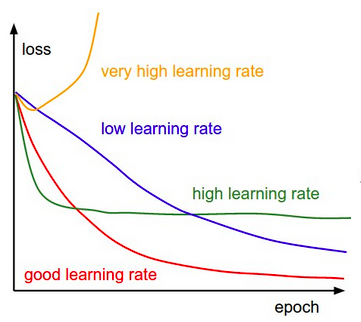

In the following example, apart from introducing the validation set, we will discuss some additional aspects.

### Step 4: Network Evaluation

To evaluate the success of network training, we need the values of the relevant metrics in the test set. In the case of neural networks, just as before, we ensure there is no overlap between the training set and the test set. The evaluation of the model is done by passing the test set through the network recording and averaging the obtained values.

In our case, for the classification task, we used accuracy as a metric.

In [ ]:
model.metrics_names

The `evaluate` function of the Keras library allows us to perform the described procedure. Its result is a string that contains the calculated values for each of the metrics listed in the `model.metrics_names` string.

In [ ]:
test_scores = model.evaluate(X_test, y_test, batch_size=32)
print('Testing set {0}: {1}'.format(model.metrics_names[1], test_scores[1]))

In order to monitor network overfitting, relevant metrics are usually monitored on the training set as well.

In [ ]:
train_scores = model.evaluate(X_train,y_train)
print('Training set {0}: {1}'.format(model.metrics_names[1], train_scores[1]))

Random division of the data set into a training set and a test set in neural networks, as in other models, can cause biased estimates. Cross-validation can be calculated by dividing the data set into groups with the `KFold` function and monitoring the obtained values. Here, for simplicity, we will get to know the `KerasClassifier`, which enables cross-validation of Keras models in the spirit of the `scikit-learn` library.

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
def baseline_model():
    model = Sequential()
    model.add(keras.Input(shape=(8,)))
    model.add(Dense(units=15, activation='relu'))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    optimizer = keras.optimizers.Adam(learning_rate = 0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])    
    return model

The `KerasClassifier` function expects the model to be launched, the number of epochs and the batch size.

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

classifier = KerasClassifier(model=baseline_model, epochs=50, batch_size=32, verbose=0)

In [ ]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('classifier', classifier)])

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)

In [ ]:
import tensorboard

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'batch_size':[100, 32],            
        } 
gs=GridSearchCV(estimator=classifier, param_grid=params, cv=2) 
gs.fit(X, y)

In [ ]:
gs.best_score_

In [ ]:
gs.fit(X, y)

### Step 5: Using the network

The `predict` method can be used to predict model values.

In [ ]:
number_of_features = X_train.shape[1]

In [ ]:
x_new = np.random.random(number_of_features).reshape(1, -1)
x_new = pd.DataFrame(data=x_new, columns=X.columns)
x_new = scaler.transform(x_new)

The value that our network predicts is the value of the sigmoid function of the last layer, so to determine whether a new instance belongs to a class or not, its value should be compared with $0.5$.

In [ ]:
y_new_sigmoid = model.predict(x_new)

In [ ]:
y_new = 0 if y_new_sigmoid < 0.5 else 1

In [ ]:
y_new

Another, slightly more compact, way to read predictions is to use the `argmax` function.

In [ ]:
np.argmax(model.predict(x_new), axis=-1)

In practice, the optimal network architecture, i.e., the number of layers, the number of neurons per layer, the corresponding activation functions, the number of training epochs, and others, are determined by a mixture of experience and parameter tunings. 